# Transformación de Fechas
## Pandas - to_datetime()
Cosijoeza Melchor Nolasco - Universidad Técnologica de la Mixteca

Maestría en Ciencia de Datos

Esta practica nos muestra cómo parsear datos de tipo 'objeto' a datos de tipo 'datetime64'.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

## Datos
Se leen los datos desde un archivo con formato csv y se revisa cómo vienen.

In [4]:
landslides = pd.read_csv("sample_data/catalog.csv")
np.random.seed(0)

In [5]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [9]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [10]:
landslides['date'].dtype

dtype('O')

## Transformación de los datos
Debido a que los datos de la columna 'date' están definidos como un tipo 'objeto', se van a transformar en el tipo de dato 'fecha y hora'.

%d para el día, %m para el mes, %y para un año de dos dígitos y %Y para un año de cuatro dígitos.

Algunos ejemplos:

17/01/07 tiene el formato "%m/%d/%y"

17-1-2007 tiene el formato "%d-%m-%Y"

In [11]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'],format="%m/%d/%y")

Los datos quedan de la siguiente manera.

In [12]:
landslides['date_parsed'].head()

,date_parsed
0,2007-03-02
1,2007-03-22
2,2007-04-06
3,2007-04-14
4,2007-04-15


## Trazar el día del mes para comprobar el analisis de la fecha
Se extraen solamente los días de la nueva columna través del metodo `dt.day`.

In [15]:
dayOfMonthLandslides = landslides['date_parsed'].dt.day
dayOfMonthLandslides.head()

,date_parsed
0,2.0
1,22.0
2,6.0
3,14.0
4,15.0


Trazamos un histograma de los días del mes. Esperamos que tenga valores entre 1 y 31.
Se puede observar que se está obteniendo valores de acuerdo a lo que se buscó.

<Axes: xlabel='date_parsed', ylabel='Count'>

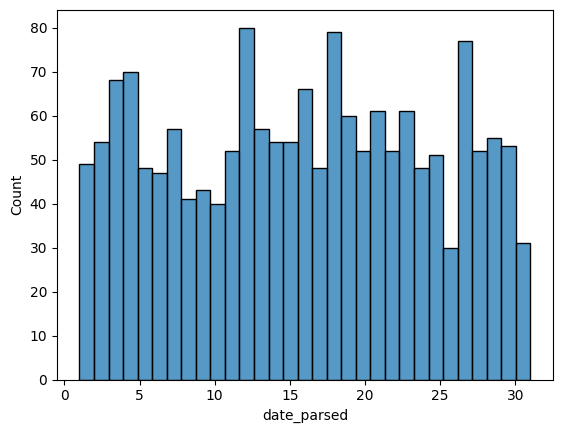

In [29]:
dayOfMonthLandslides = dayOfMonthLandslides.dropna()
sns.histplot(dayOfMonthLandslides,kde=False,bins=31)